In [25]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
path_train  = '/kaggle/input/pothole-detection-dataset/train/images'
ext = "*.jpg"
label_train = '/kaggle/input/pothole-detection-dataset/train/labels'
t_ext = '*.txt'

In [27]:
path_valid  = '/kaggle/input/pothole-detection-dataset/valid/images'
label_valid = '/kaggle/input/pothole-detection-dataset/valid/labels'

In [28]:
img = [f for f in glob.glob(path_train +'**/'+ext,recursive=True)]


In [29]:
i =cv2.imread(img[0]) # To check size of the image

In [30]:
i.shape # It shows it is of 640 *640 size

(640, 640, 3)

In [31]:
lab = [t for t in glob.glob(label_train + '**/'+t_ext,recursive=True)]

In [32]:
lab

['/kaggle/input/pothole-detection-dataset/train/labels/491_jpg.rf.0ddc5da159f1fd9d4c7fa7e0c4a4f3b5.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/33_jpg.rf.d68c98c81c10e78866cd566678af4b02.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/385_jpg.rf.5876ab76b7a78ce65ea0f144b8f1b9e6.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/511_jpg.rf.bc577973584eb70069031c9fefcff61d.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/448_jpg.rf.bf81699ab22dffa215439d7f558051e4.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/10_jpg.rf.0852ff437d690b43fd504e3b6426f2be.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/211_jpg.rf.c423607b6c6de7b937794c9cefe26ef7.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/110_jpg.rf.2aa8b70963ff1c32bd86d43906e83327.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/660_jpg.rf.4a3aa21e7c81aa702c53013f2accda17.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/85

In [33]:
lab_s = lab[:30]

In [34]:
lab_s

['/kaggle/input/pothole-detection-dataset/train/labels/491_jpg.rf.0ddc5da159f1fd9d4c7fa7e0c4a4f3b5.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/33_jpg.rf.d68c98c81c10e78866cd566678af4b02.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/385_jpg.rf.5876ab76b7a78ce65ea0f144b8f1b9e6.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/511_jpg.rf.bc577973584eb70069031c9fefcff61d.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/448_jpg.rf.bf81699ab22dffa215439d7f558051e4.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/10_jpg.rf.0852ff437d690b43fd504e3b6426f2be.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/211_jpg.rf.c423607b6c6de7b937794c9cefe26ef7.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/110_jpg.rf.2aa8b70963ff1c32bd86d43906e83327.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/660_jpg.rf.4a3aa21e7c81aa702c53013f2accda17.txt',
 '/kaggle/input/pothole-detection-dataset/train/labels/85

In [35]:
img_s = img[:30]

In [36]:
n = len(img)
n

2067

In [37]:
l = len(lab)
l

2067

In [38]:
x, y, width, height = [], [], [], []
for label_path in lab_s:
    with open(label_path, 'r') as file:
        for line in file:
            p = line.split(' ')
            x.append(float(float(p[1]) - float(float(p[3])/2)))
            y.append(float(float(p[2]) - float(float(p[4])/2)))
            width.append(float(p[3]))
            height.append(float(p[4]))

In [39]:
x[:5] # After Extracting the Co-ordinates we see that it is not in correct format as it is required for images

[0.35269413253001664,
 0.34693664220631426,
 0.1448904818664972,
 0.28468008088510954,
 0.31949199459715383]

In [40]:
h,w,c = i.shape

In [41]:
scale =h

In [42]:
scale

640

In [43]:
# rescaling the coordinates to fit the scale of the images which is 640 x 640
for i in range(len(x)):
    x[i] = x[i] * scale
    y[i] = y[i] * scale
    width[i] = width[i] * scale
    height[i] = height[i] * scale

In [44]:
x[i]

74.89052770747777

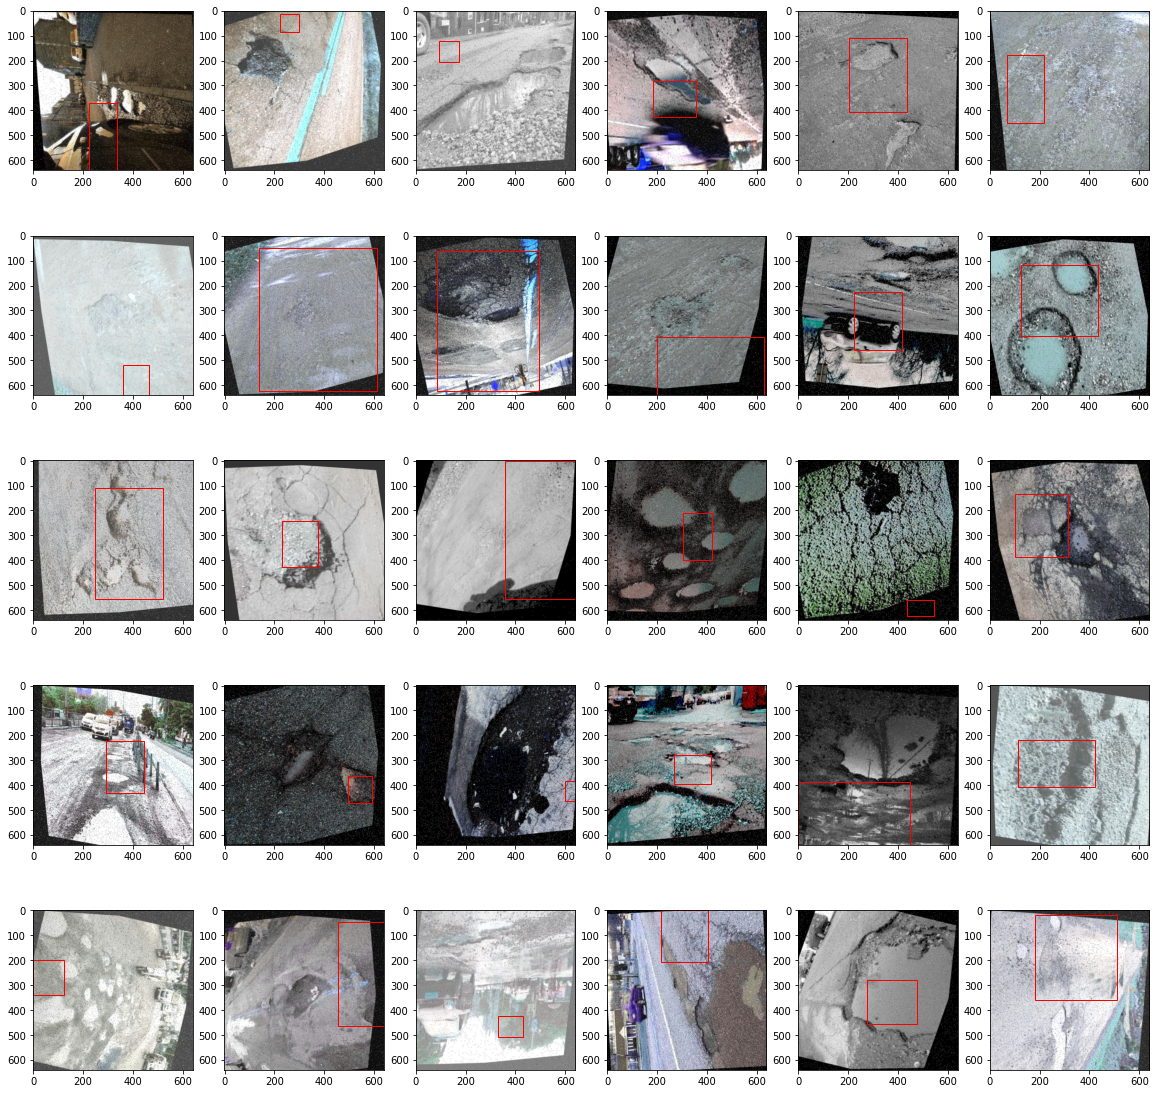

In [45]:
from matplotlib.patches import Rectangle

fig,ax = plt.subplots(5,6,figsize=(20,20))
ax = ax.ravel()
for i,im in enumerate(img_s):    
    fi = os.path.join(path_train,im)
    re = cv2.imread(fi)
    ax[i].imshow(re)
    rect = Rectangle((x[i], y[i]), width[i], height[i], linewidth=1, edgecolor='r', facecolor='none')  
    ax[i].add_patch(rect)
plt.show()
    